Instructions:
    
==> Write a python function that will plot the points that come from the following procedure: 

- Create a hexagon
- Pick a random point, P, inside the hexagon. 
- Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
- Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 

Plot all of your 10,000 random points. What shape does it describe? 


In [3]:
def draw_crazy_polygon(ntime,sides):   
    # ntime = number of repetition
    # sides = number of sides of the polygon (if hexagon enter 6) 
    
    
    # Description of this function:
    #      - Create a regular polygon of a specified number of sides (as sides) 
    #      - Pick a random point, P, inside the hexagon. 
    #      - Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
    #      - Compute the centroid of T. This becomes your new random point, P.  
    #        Save it, make a new random triangle as above, compute the new centroid etc… 
    #      - Repeat this process ntimes times.  
    
    
    # Import packages needed in the function
    import numpy as np
    from random import randrange, randint
    import math
    from matplotlib.path import Path

    
    #draw regular polygon with sides being the number of sides defined by user
    a = 2* math.pi/sides
    r = 100
    x = 0
    y = 0 
    poly_pts = []
    for i in range(sides):
        p1 = x + r*math.cos(a*i)
        p2 = y + r*math.sin(a*i)
        poly_pts.append([p1,p2])
    poly_pts = np.array(poly_pts)   # points is the 
    
    # create a random point P and check if it is inside the polygon created
    INSIDE = 0
    while INSIDE != True:
        # create a random point within the min and max values of the hexagon 
        P = [[randrange(int(poly_pts[:,0].min()),int(poly_pts[:,0].max())),
              randrange(int(poly_pts[:,1].min()),int(poly_pts[:,1].max()))]]
        # check that P is inside the hexagaon
        INSIDE = Path(poly_pts).contains_points(P)

    # create the output array with all the new P created
    P_all = P

    for i in range(ntime):    
        # select 2 random vortices (next to each other)
        rn = randint(0,sides-1) 
        T1 = poly_pts[rn]
        if rn < sides-1:          # if the vortices is not the last vortices, take the next one
            T2 = poly_pts[rn+1]
        elif rn == sides-1:       # if T1 is the last vortices of points, choose the first data point in points
            T2 = poly_pts[0]
        T = np.vstack([P,T1,T2]) # coordinates of the new triangle T

        # calculate the centroid of the triangle T
        newPx = round(np.mean(T[:,0]),2)  
        newPy = round(np.mean(T[:,1]),2)
        
        # store-assign data
        P_all.append([newPx,newPy]) # coordinates of the new P store into P_all
        P = [newPx,newPy]  #assign the new coordinates to the new P points
    
    P_all = np.array(P_all)
    
    return poly_pts, P_all




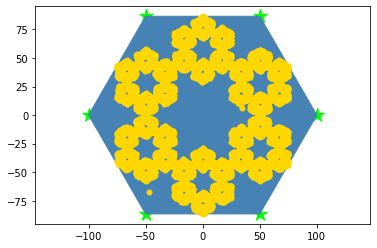

In [5]:
poly_pts, P_all = draw_crazy_polygon(10000,6)

# plot the result of the function 'draw_crazy_polygon'

import matplotlib.patches
import matplotlib.pyplot as plt


plt.figure()
plt.axis('equal')
plt.scatter(poly_pts[:,0], poly_pts[:,1], marker='*', s=200, color = 'lime')
poly = plt.Polygon(poly_pts, color='steelblue')
plt.gca().add_patch(poly)
plt.scatter(P_all[:,0],P_all[:,1],marker='.',s=100,color='gold', zorder=2)
plt.show()